# Organizational Oscillation V2

This notebook runs the PySD model. It runs the vensim .mdl model

Last Update: 11/15/2023
Author: @georgia-max


In [90]:
import pysd 
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import seaborn as sns 

In [146]:
model = pysd.read_vensim("../Vensimmodel/Organizational_oscillation_v4.mdl")
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Acceptable Safety Performance,acceptable_safety_performance,None,None,"(0.0, nan)",Constant,Normal,None
1,Accident,accident,None,None,"(nan, nan)",Auxiliary,Normal,None
2,Change in NonSafety Focus,change_in_nonsafety_focus,None,None,"(nan, nan)",Auxiliary,Normal,None
3,Change in Safety Focus,change_in_safety_focus,None,None,"(nan, nan)",Auxiliary,Normal,None
4,Constant,constant,None,None,"(nan, nan)",Constant,Normal,None
5,Error Margin,error_margin,None,None,"(nan, nan)",Auxiliary,Normal,None
6,FINAL TIME,final_time,None,Year,"(nan, nan)",Constant,Normal,The final time for the simulation.
7,INITIAL TIME,initial_time,None,Year,"(nan, nan)",Constant,Normal,The initial time for the simulation.
8,NonSafety Focus,nonsafety_focus,None,None,"(nan, nan)",Stateful,Integ,None
9,NonSafety Performance,nonsafety_performance,None,None,"(nan, nan)",Auxiliary,Normal,None


# Case Study 

## Base Model

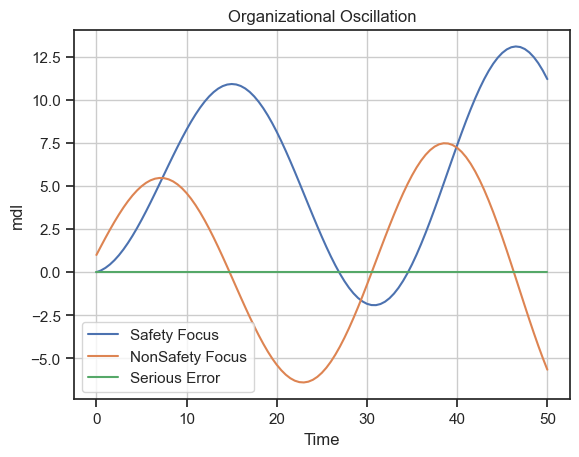

In [147]:
#Base Model
initial_condition = {
    'Pulse start time': 0, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 2, 
    'Pulse Time': 2,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 0, 
    
    }
m1 = model.run(params= initial_condition)

m1['Safety Focus'].plot()
m1['NonSafety Focus'].plot()
m1['Serious Error'].plot()

plt.title("Organizational Oscillation") 
# plt.ylim(-1000, 1000)

plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()


## Pulse in 10 

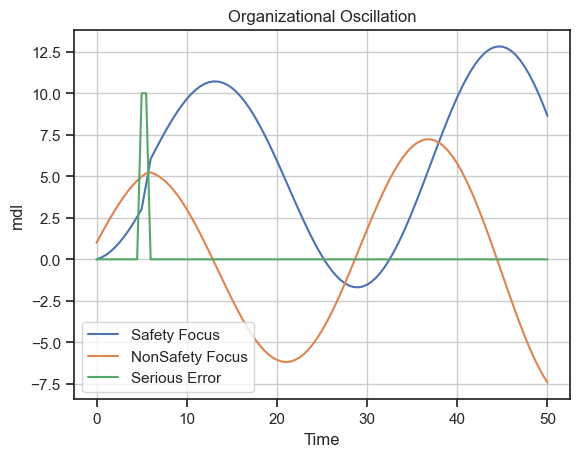

In [148]:
condition = {
    'Pulse start time': 1, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 5, 
    'Pulse Duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 5,
    
    }

m2 = model.run(params = condition)

m2['Safety Focus'].plot()
m2['NonSafety Focus'].plot()
m2['Serious Error'].plot()


plt.title("Organizational Oscillation") 
plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

## Pulse in 20

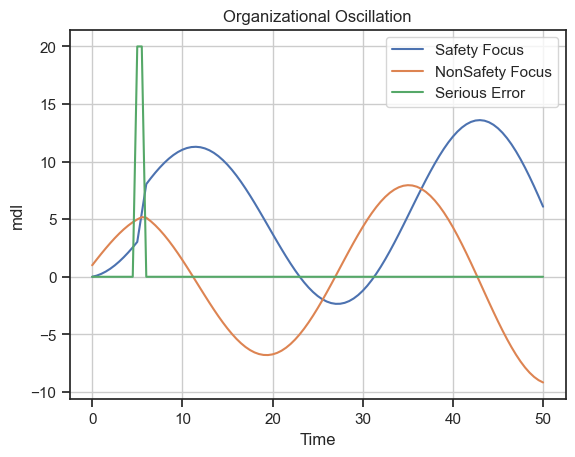

In [149]:
condition = {
    'Pulse start time': 1, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 10, 
    'Pulse Duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 5,
    
    }
m3 = model.run(params= condition)

m3['Safety Focus'].plot()
m3['NonSafety Focus'].plot()
m3['Serious Error'].plot()

plt.title("Organizational Oscillation") 
plt.ylabel("mdl")
plt.xlabel("Time")
# plt.ylim(-1500, 1500)

plt.legend()
plt.grid()

# Test 1. magnitude of the error incident. 

Testing different magnitude of the incident. According to XX, the larger the safety incident (Pulse Quantity), the longer the cycle. 

- Hypothesis: the larger the safety incident (Pulse Quantity), the larger the cycle time
- Condition: There is a pulse at time 5, with a duration of 1. 
- Result: Confirm 

#TODO find reference literature on the magnitude of the error incident. 


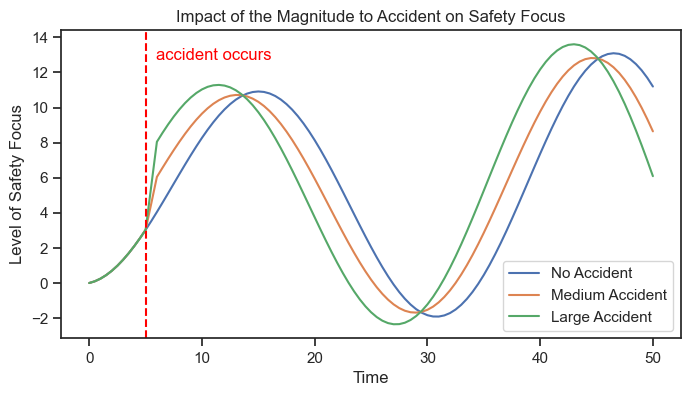

In [152]:
# Seaborn style 
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))

m1['Safety Focus'].plot(label = 'No Accident')
m2['Safety Focus'].plot(label = 'Medium Accident')
m3['Safety Focus'].plot(label = 'Large Accident')

plt.title("Impact of the Magnitude to Accident on Safety Focus")
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")
# plt.grid()
plt.legend(loc='lower right')

plt.axvline(x = 5, linestyle = 'dashed', 
           color = 'red')
# Add an arrow
# plt.arrow(2, 5, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Add text "GFG" at the end of the arrow
plt.text(11, 13, "accident occurs", color='red', fontsize=12, ha='center', va='center')


plt.show()

# legend on the right low side 


# Test 1. Time to adjust focus 

Testing different time to adjust focus. According to XX, management style effects the timing the organization deals with adjusting to safety focus. The shorter the time to adjust focus, the faster the organization adapts. 

- Hypothesis: the longer it took to adjust focus, the longer the cycle runs.
- Condition: There is a pulse at time 5, with a duration of 1.
- Parameter: Time to adjust focus = [5, 10, 15]
- Result:  




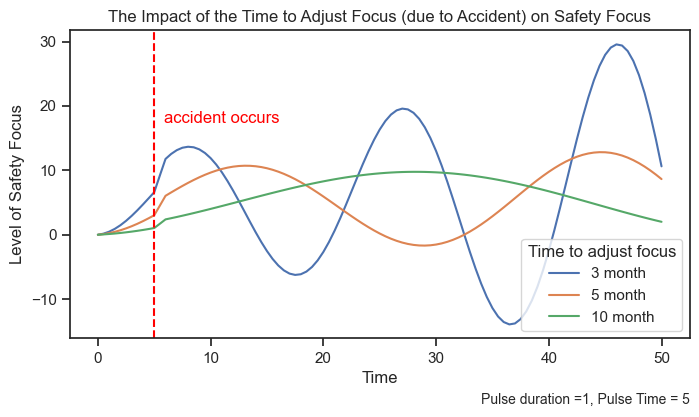

In [139]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))


initial_condition = {
    'Pulse start time': 0, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 5, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3
    }
m1 = model.run(params= initial_condition)

m1['Safety Focus'].plot(label = '3 month')

condition = {'Time to adjust focus': 5}
initial_condition.update(condition)

m2 = model.run(params= initial_condition)
m2['Safety Focus'].plot(label = '5 month')

condition = {'Time to adjust focus': 10}
initial_condition.update(condition)

m3 = model.run(params= condition)
m3['Safety Focus'].plot(label = '10 month')

plt.title("The Impact of the Time to Adjust Focus (due to Accident) on Safety Focus") 
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")

plt.legend(title= 'Time to adjust focus')

# Add a footnote below and to the right side of the chart
ax.annotate('Pulse duration =1, Pulse Time = 5',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

plt.axvline(x = 5, linestyle = 'dashed', 
           color = 'red')
# Add an arrow
# plt.arrow(2, 5, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Add text "GFG" at the end of the arrow
plt.text(11, 18, "accident occurs", color='red', fontsize=12, ha='center', va='center')

plt.legend(title = 'Time to adjust focus', loc='lower right')

plt.show()

# Test 3 

A firm who have a large shock v.s. A firm who has many small errors. 

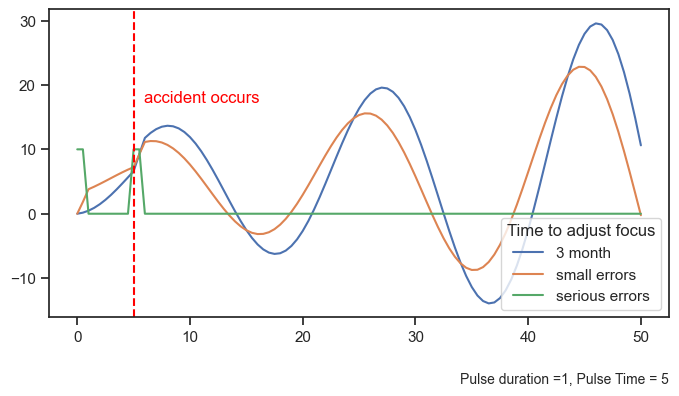

In [157]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))


condition1 = {
    'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 5, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3

    
    }
m1 = model.run(params= condition1)

m1['Safety Focus'].plot(label = '3 month')

condition2= {
    'Pulse start time': 0, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 5, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 5, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3
    }
m2 = model.run(params= condition2)
m2['Safety Focus'].plot(label = 'small errors')
m2['Serious Error'].plot(label = 'serious errors')


plt.legend(title= 'Time to adjust focus')

# Add a footnote below and to the right side of the chart
ax.annotate('Pulse duration =1, Pulse Time = 5',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

plt.axvline(x = 5, linestyle = 'dashed', 
           color = 'red')
# Add an arrow
# plt.arrow(2, 5, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Add text "GFG" at the end of the arrow
plt.text(11, 18, "accident occurs", color='red', fontsize=12, ha='center', va='center')

plt.legend(title = 'Time to adjust focus', loc='lower right')

plt.show()